# Overview
File contains the steps for building a classifier based just on the context features, (ie ignoring the step features).

In [1]:
from ClassifierFunctions import *

import os

%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
data_dir = 'SavedData'

In [3]:
data = pickle.load(open(os.path.join(data_dir, 'processed_data.pkl'), 'rb'))
features_dict = pickle.load(open(os.path.join(data_dir, 'features_dict.pkl'), 'rb'))

## Classifying without text features

Before examing the words, I want to just look at my context features and my simple engineered features. 

### Decision Tree
I want to try a super simple decision tree, as this could give us our "business rules" that we were originally looking for when making classifications. 

In [4]:
# context features w/o simple label
top_features =  ['committee_position_prev',
                'committee_position',
                'committee_position_next',

                'simple_label_prev',
#                 'simple_label',
                'simple_label_next'
                ]

model_features = []
for feat in top_features:
    # adds every feature in the bottom level list
    model_features += features_dict['context_features'][feat]

In [5]:
X, y = data[model_features], data.binary_label


SCORES:

Average Accuracy: 0.671468443837
Average Precision:  0.75685096081
Average Recall: 0.660740740741
Average F1:  0.701315881942

Pipeline Parameters:
{'clf__max_depth': 10}



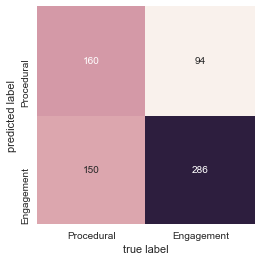

In [7]:
# Using a pipeline so I can add more preprocessing later
clf = DecisionTreeClassifier()
dt_param_grid = {'clf__max_depth': [3, 5, 7, 10, None]}

pipeline = [('clf', clf)]
model = Pipeline(pipeline)

grid = evaluate_model(model, dt_param_grid, X, y)

Before examining the tree, I want to look at how a few other classifiers perform. 

### Logistic Regression

I just want to see how this performs with a basic classification algorithm


SCORES:

Average Accuracy: 0.624014581909
Average Precision:  0.614729264938
Average Recall: 0.965185185185
Average F1:  0.750831280867

Pipeline Parameters:
{'clf__C': 0.01, 'clf__fit_intercept': False}



GridSearchCV(cv=<sklearn.model_selection._split.RepeatedStratifiedKFold object at 0x000002BC7E08AD68>,
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'clf__fit_intercept': [True, False], 'clf__C': [0.001, 0.01, 0.1, 1, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

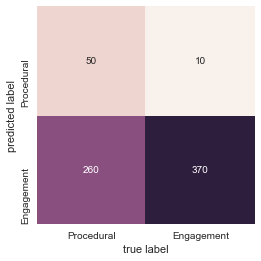

In [8]:
# Using a pipeline so I can add more preprocessing later
clf = LogisticRegression()
dt_param_grid = {'clf__C': [.001, .01, .1, 1, 100], 
                 'clf__fit_intercept': [True, False]}

pipeline = [('clf', clf)]
model = Pipeline(pipeline)

evaluate_model(model, dt_param_grid, X, y)

## Looking at engineered features and context

In [9]:
model_features = []

# context features w/o simple label
top_features =  ['committee_position_prev',
                'committee_position',
                'committee_position_next',

                'simple_label_prev',
                'simple_label_next'
                ]
for feat in top_features:
    # adds every feature in the bottom level list
    model_features += features_dict['context_features'][feat]
    
extra_features =  ['word_count', 
                   '?_count']
model_features += extra_features

In [10]:
X, y = data[model_features], data.binary_label

#### Logistic Regression


SCORES:

Average Accuracy: 0.770938710412
Average Precision:  0.749300899786
Average Recall: 0.922222222222
Average F1:  0.825730522064

Pipeline Parameters:
{'clf__C': 0.01, 'clf__fit_intercept': True}



GridSearchCV(cv=<sklearn.model_selection._split.RepeatedStratifiedKFold object at 0x000002BC7E383B38>,
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'clf__fit_intercept': [True, False], 'clf__C': [0.001, 0.01, 0.1, 1, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

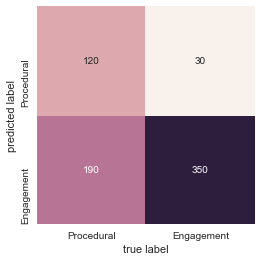

In [11]:
clf = LogisticRegression()
param_grid = {'clf__C': [.001, .01, .1, 1, 100], 
                 'clf__fit_intercept': [True, False]}

pipeline = [('clf', clf)]
model = Pipeline(pipeline)

evaluate_model(model, param_grid, X, y)

Woah, this is pretty good actually

#### RandomForest


SCORES:

Average Accuracy: 0.758350421508
Average Precision:  0.785844956878
Average Recall: 0.814814814815
Average F1:  0.797547030675

Pipeline Parameters:
{'clf__max_depth': 5, 'clf__n_estimators': 10}



GridSearchCV(cv=<sklearn.model_selection._split.RepeatedStratifiedKFold object at 0x000002BC7E383C88>,
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'clf__max_depth': [5, 10, None], 'clf__n_estimators': [5, 10, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

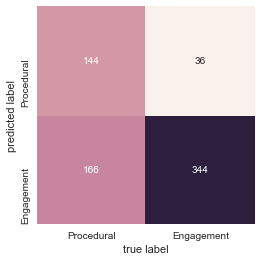

In [12]:
clf = RandomForestClassifier()
param_grid = {'clf__n_estimators': [5, 10, 15], 
              'clf__max_depth': [5, 10, None]}

pipeline = [('clf', clf)]
model = Pipeline(pipeline)

evaluate_model(model, param_grid, X, y)

#### SVM


SCORES:

Average Accuracy: 0.793939393939
Average Precision:  0.772231534005
Average Recall: 0.923703703704
Average F1:  0.84050828406

Pipeline Parameters:
{'clf__C': 1, 'clf__gamma': 0.2}



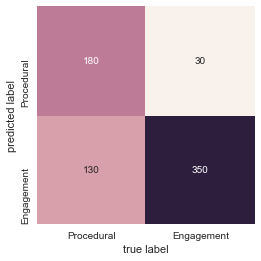

In [13]:
clf = SVC(probability=True)
param_grid = {'clf__C': [.01, .1, 1, 10], 
              'clf__gamma': [.01, .1, .2, 1]}

pipeline = [('clf', clf)]
model = Pipeline(pipeline)

grid = evaluate_model(model, param_grid, X, y)

My SVM actually ended up being a great estimator all on it's own. I considered using this without even looking at text. 

Estimator is pickled for other notebooks. 

In [15]:
clf_context = grid.best_estimator_
pickle.dump(clf_context, open(os.path.join(data_dir, 'clf_context.p'), 'wb'))